# Grid Search with an SVM Model

### What is SVM?
Support Vector Machines, or SVM for short, is a supervised ML model used commonly for **binary classification** (but sometimes for regression). The model is said to be non-probabilistic, because it does not assign probabilities to the different categories. Put simply, SVM divides the training data by mapping it on some space and determining the widest gap between the 2 classes. 

It's likely that there are many potential lines we could draw to seperate our classes. SVM chooses the line that maximizes the margin between the 2 classes. 
Consider the photo below: 
- the pink line is considered our **hyperplane** (line that seperates our two classes)
- the dotted lines on either side of the hyperplane are the **margin lines**
- the yellow points that touch our margin lines are called our **support vectors**


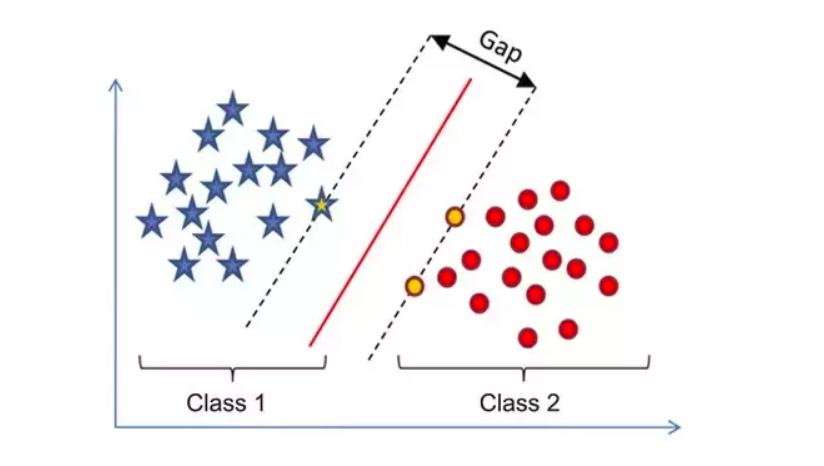



We can take this one step further and apply the same idea to non linear datasets. Here's a visiual image of how a non-linear kernel SVM model might look:

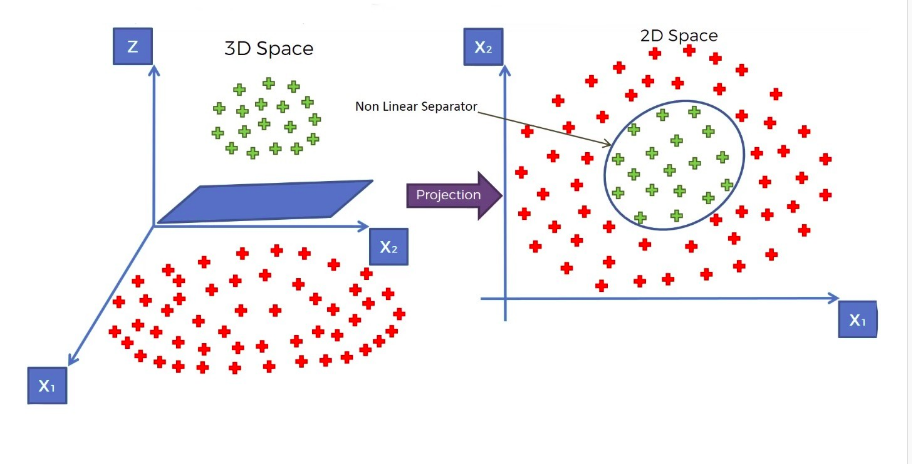


Let's start with the basics and build up!

## Beginners SVM Model
In this demo, we will look at the breast cancer dataset from sklearn's open source data sets. It's easy to import and very insightful!

In [1]:
# Import analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset
from sklearn.datasets import load_breast_cancer

/home/hanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# Check out the keys of the data
bc_data = load_breast_cancer()
bc_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Sklearn data does not come as a pandas dataframe. If we want to explore it using pandas, we'll need to create a dataframe from these variables. If you'd like to know more about this data or it's structure, check out bc_data['DESC'] for its description, or the sklearn official documentation.

In [7]:
# Create a pandas dataframe and check out the head

df_feat = pd.DataFrame(data=bc_data['data'], columns=bc_data['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To me, this data is a little confusing without more domain research. Some of the column names seem less intuitive to me, so we will not be doing any official analysis on this data (since we have no domain experience in cancer research). Let's jump right into the fun stuff!

In [8]:
# Check the data's schema to confirm it's all of type float or int
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [11]:
# Check the target variable
bc_data['target'][:50:5]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [12]:
# Train test split your data and target variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feat, bc_data['target']
                                                   , test_size = 0.3
                                                   , random_state = 101)


In [13]:
# Import and instantiate the model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

/home/hanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hanna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
# Import metrics and make predictions with them
from sklearn.metrics import classification_report, confusion_matrix

svc_pred = model.predict(X_test)

print(classification_report(y_test, svc_pred))
print('\n')
print(confusion_matrix(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



[[  0  66]
 [  0 105]]


/home/hanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model has an accuracy of 61%. This is not much better than just random guessing. Furthermore, the precision and recall for the 0 class are both 0%!

What can we do to improve our model?

ML models by themselves are cool, but the real magic occurs in the **hyperparameter tuning**. Remember the k value from KNN? This is an example of a hyperparameter (a parameter we insert into the model before training) that changes the outcome of our model. Most of a data scientists work will come from finding optimal values for these hyperparameters. 
But trying every possible value of every possible hyperparameter can be exhaustive work with no guarantee for model improvement. Turns out, there are methods we can use to help automatically tune these hyperparameters within a certain range.

One common method for finding optimal hyperparameters is called a **grid search**. We can use sklearn to test it out. 

If you want more information on what we're about to do, I suggest you check out the [sklearn documentation for grid search on an SVM model](https://scikit-learn.org/stable/modules/grid_search.html).

Which hyperparameters should you tune? That depends on your thoroughness and use case. For now, we'll start with some basic SVM hyperparameters :
- 'C' controls the cost of misclassification in the model by placing a high penalty on misclassified values; a large C value will create low bias and high variance. 
- 'gamma' defines how far a single training example's influence will reach (check out [this 2 minute youtube video on gamma in SVM](https://www.youtube.com/watch?v=m2a2K4lprQw)). If gamma is high, only the values close to the hyperplane will matter for our testing, which might cause our hyperplane line to be less smooth.


In [27]:
# Import sklearn's grid search
from sklearn.model_selection import GridSearchCV

In [20]:
# Create values of the hyperparameters you wish to test
param_grid = {'C': [0.1,1,10,100,1000],
             'gamma':[1, 0.1, 0.001, 0.0001]}

# Set the gridsearch with our model and parameter grid
# Warning: this may take some time depending on how many values
# you are checking, so set verbose to a non zero
# number so we get some outut while this is running
grid = GridSearchCV(SVC(), param_grid, verbose=3)

Now we will run our grid search by calling .fit on this method. The grid search is going to continuously run the model with these different values until it finds the hyperparameter values that maximize our model's metrics. Neat, huh?

In [21]:
grid.fit(X_train, y_train)

/home/hanna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
# Find out which params did the best
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [23]:
# Find out which estimator did the best
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# What was our best score?
grid.best_score_

0.9547738693467337

Wow, a 95%! That's more than 30% increase from our original model. Way to go grid search!

In [26]:
# Print the confusion matrix and classification report
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[ 60   6]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

